## Load MNIST dataset


In [1]:
from tensorflow.keras.datasets import cifar10, fashion_mnist, mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Training image shape:", x_train.shape)  # (60000, 28, 28)
print("Training label shape:", y_train.shape)  # (60000,)
print("First five training labels:", y_train[:5])  # array([5 0 4 1 9], dtype=uint8)


Training image shape: (60000, 28, 28)
Training label shape: (60000,)
First five training labels: [5 0 4 1 9]


## ResNetBlock


In [2]:
import timeit
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.ResNetBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)

resnet_auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=3, overwrite=True, seed=42
)

start_time = timeit.default_timer()
# Use the first 100 training samples for 1 epoch with batch_size=8 as a quick demo.
# You may run with the full dataset with 10 epochs and a larger batch size, but expect a longer training time.
resnet_auto_model.fit(x_train[:100], y_train[:100], epochs=1, batch_size=8)
stop_time = timeit.default_timer()
print("Total time: {time} seconds.".format(time=round(stop_time - start_time, 2)))


Trial 3 Complete [00h 02m 33s]
val_loss: 1031.3736572265625

Best val_loss So Far: 1031.3736572265625
Total elapsed time: 00h 07m 42s
13/13 [==============================] - 97s 7s/step - loss: 66.8035 - accuracy: 0.1500


Total time: 660.71 seconds.


### Get the summarized results during the tuning process


In [3]:
resnet_auto_model.tuner.results_summary()


Results summary
Results in ./auto_model
Showing 10 best trials
Trial summary
Hyperparameters:
res_net_block_1/pretrained: False
res_net_block_1/version: resnet50
res_net_block_1/imagenet_size: True
classification_head_1/spatial_reduction_1/reduction_type: flatten
classification_head_1/dropout: 0.25
optimizer: adam
learning_rate: 0.001
Score: 1031.3736572265625
Trial summary
Hyperparameters:
res_net_block_1/pretrained: False
res_net_block_1/version: resnet50
res_net_block_1/imagenet_size: True
classification_head_1/spatial_reduction_1/reduction_type: flatten
classification_head_1/dropout: 0
optimizer: adam
learning_rate: 0.001
Score: 24240.5625
Trial summary
Hyperparameters:
res_net_block_1/pretrained: False
res_net_block_1/version: resnet50
res_net_block_1/imagenet_size: True
classification_head_1/spatial_reduction_1/reduction_type: flatten
classification_head_1/dropout: 0
optimizer: adam
learning_rate: 0.1
Score: 1.2663897949412424e+37


### Display best model


In [4]:
best_resnet_model = resnet_auto_model.export_model()
best_resnet_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 cast_to_float32 (CastToFloat32  (None, 28, 28)      0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 28, 28, 1)   0           ['cast_to_float32[0][0]']        
 )                                                                                                
                                                                                              

### Evaluate the best resnet model on the test data.


In [5]:
# Only evaluating the first 100 samples as a quick demo
test_loss, test_acc = resnet_auto_model.evaluate(
    x_test[:100], y_test[:100], batch_size=8
)
print("Accuracy: {accuracy}%".format(accuracy=round(test_acc * 100, 2)))


13/13 [==============================] - 22s 2s/step - loss: 7598.3330 - accuracy: 0.1100
Accuracy: 11.0%


## XceptionBlock


In [6]:
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.Normalization()(input_node)
output_node = ak.XceptionBlock()(output_node)
output_node = ak.ClassificationHead()(output_node)

xception_auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=3, overwrite=True, seed=42
)

start_time = timeit.default_timer()
# Use the first 100 training samples for 1 epoch with batch_size=8 as a quick demo.
# You may run with the full dataset with 10 epochs and a larger batch size, but expect a longer training time.
xception_auto_model.fit(x_train[:100], y_train[:100], epochs=1, batch_size=8)
stop_time = timeit.default_timer()
print("Total time: {time} seconds.".format(time=round(stop_time - start_time, 2)))


Trial 3 Complete [00h 00m 33s]
val_loss: 2.297600030899048

Best val_loss So Far: 2.297600030899048
Total elapsed time: 00h 01m 33s
13/13 [==============================] - 25s 1s/step - loss: 3.8498 - accuracy: 0.2300


Total time: 155.7 seconds.


### Display the best xception model


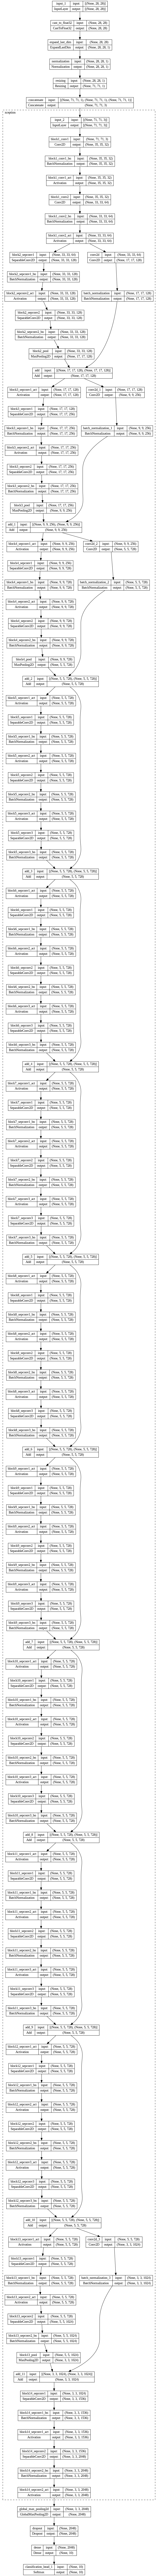

In [7]:
import tensorflow as tf

best_xception_model = xception_auto_model.export_model()
tf.keras.utils.plot_model(
    best_xception_model, show_shapes=True, expand_nested=True
)  # rankdir='LR'


In [8]:
best_xception_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 cast_to_float32 (CastToFloat32  (None, 28, 28)      0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 28, 28, 1)   0           ['cast_to_float32[0][0]']        
 )                                                                                                
                                                                                              

### Evaluate the best xception model on the test data.


In [9]:
# Only evaluating the first 100 samples as a quick demo
test_loss, test_acc = resnet_auto_model.evaluate(x_test[:100], y_test[:100])
print("Accuracy: {accuracy}%".format(accuracy=round(test_acc * 100, 2)))


4/4 [==============================] - 6s 921ms/step - loss: 2.3015 - accuracy: 0.1400
Accuracy: 14.0%


## HyperBlock for image classification (ImageBlock)


In [10]:
import timeit
import autokeras as ak

input_node = ak.ImageInput()
output_node = ak.ImageBlock(
    # Normalize the dataset.
    normalize=True,
    # Do not do data augmentation.
    augment=False,
)(input_node)
output_node = ak.ClassificationHead(dropout=0.0)(output_node)

auto_model = ak.AutoModel(
    inputs=input_node, outputs=output_node, max_trials=3, overwrite=True, seed=42
)

start_time = timeit.default_timer()
# Use the first 100 training samples for 1 epoch and batch_size=8 as a quick demo.
# You may run with the full dataset with 10 epochs with a larger batch size, but expect a longer training time.
auto_model.fit(x_train[:100], y_train[:100], epochs=1, batch_size=8)
stop_time = timeit.default_timer()
print("Total time: {time} seconds.".format(time=round(stop_time - start_time, 2)))


Trial 3 Complete [00h 00m 32s]
val_loss: 2.2660348415374756

Best val_loss So Far: 2.2420527935028076
Total elapsed time: 00h 01m 20s
13/13 [==============================] - 17s 698ms/step - loss: 2.4188 - accuracy: 0.2600


Total time: 142.38 seconds.


In [11]:
auto_model.tuner.results_summary(num_trials=1)


Results summary
Results in ./auto_model
Showing 1 best trials
Trial summary
Hyperparameters:
image_block_1/block_type: resnet
image_block_1/res_net_block_1/pretrained: False
image_block_1/res_net_block_1/version: resnet50_v2
image_block_1/res_net_block_1/imagenet_size: False
classification_head_1/spatial_reduction_1/reduction_type: flatten
optimizer: adam
learning_rate: 0.001
Score: 2.2420527935028076


In [12]:
best_model = auto_model.export_model()
best_model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 cast_to_float32 (CastToFloat32  (None, 28, 28)      0           ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 expand_last_dim (ExpandLastDim  (None, 28, 28, 1)   0           ['cast_to_float32[0][0]']        
 )                                                                                                
                                                                                              

In [13]:
# Only evaluating the first 100 samples as a quick demo
test_loss, test_acc = auto_model.evaluate(x_test[:100], y_test[:100], batch_size=8)
print("Accuracy: {accuracy}%".format(accuracy=round(test_acc * 100, 2)))


13/13 [==============================] - 2s 53ms/step - loss: 2.2801 - accuracy: 0.1200
Accuracy: 12.0%
